<a href="https://colab.research.google.com/github/Pager07/TensorflowSpecialization/blob/master/C3W2_HyperParameterAndGlobalAvgPoolAndEval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downloading the data 


In [1]:
import tensorflow as tf
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-07-26 09:29:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  13.7MB/s    in 0.4s    

2020-07-26 09:29:09 (13.7 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



#Preporcessing Data

In [2]:
import json

with open('/tmp/sarcasm.json','r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  

In [34]:
#The trick is to have hyper-parameters together so it's easy to change and view the effects
#Hyper-parameter
training_size = 20000
vocab_size = 1000 #(was 10,000)
oov_token = '<OOV>'

max_length = 16 #(was 32) 
padding_type = 'post'
trunc_type = 'post'

embedding_dim = 32 #(was 16)

In [26]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]


In [27]:
# intialize the tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words= vocab_size, oov_token = oov_token )
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

#make sequences 
from tensorflow.keras.preprocessing.sequence import pad_sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)




In [28]:
#Covert everything to numpy array
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


#Model

In [29]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(units= 24, activation='relu'),
                             tf.keras.layers.Dense(units=1 , activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs= num_epochs , validation_data=(testing_padded, testing_labels), verbose=2)

#Evalution

What is loss?
  - Think is as the inverse of confidence per prediction

In [10]:
import matplotlib.pyplot as plt

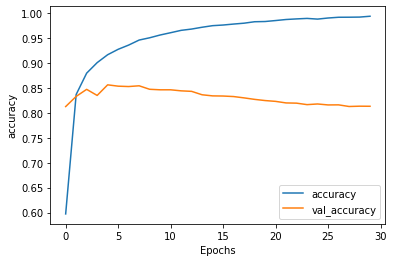

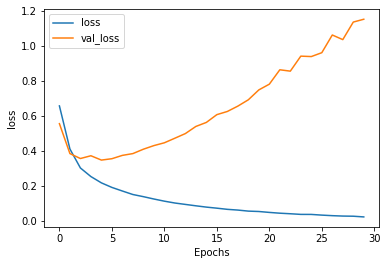

In [16]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
#for max_length = 32 , vocab_size = 10,000
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

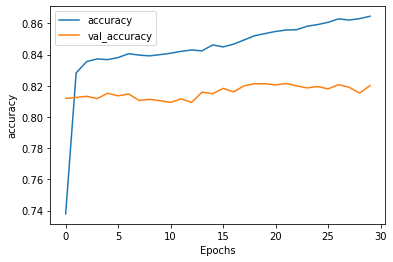

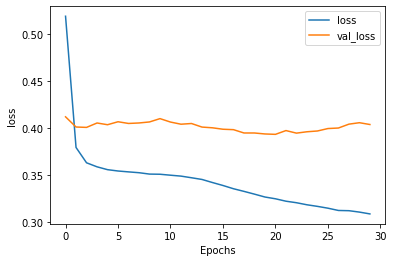

In [24]:
#for max_length = 16 (reduce the likehood of padding) ,  vocab_size = 1000 
'''
You can see Two things:
-  The validation loss has flattened out
-  The accuracy is lower
'''
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

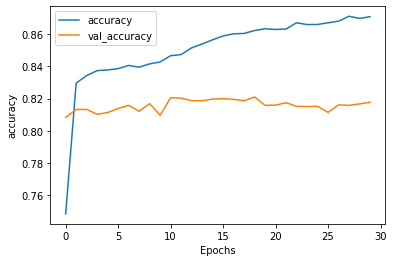

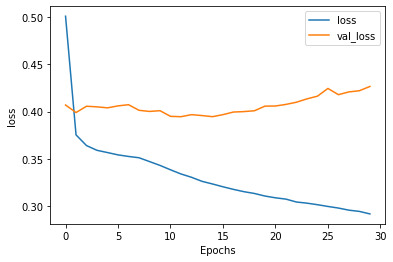

In [33]:
#for max_length = 16 (reduce the likehood of padding) ,  vocab_size = 1000 and embedding_size = 32
'''
Observations:
- The loss is somewhat stabel (just like before)
- The accuracy is also below 0.8 (just like before)
'''
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')